# Part 1: Implementing Logistic Regression from Scratch

In this part of the lab, you will be requested to implement logistic regression from scratch. This means you will need to make use of gradient descent to find the parameters of the model.


In [488]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [489]:
def plot_loss(title, values):
    '''
    This function will allow us to check the evolution of the loss function during gradient descent
    Inputs:
    Title - title of the plot
    Values - values to be plotted
    '''
    plt.figure(figsize=(3, 3))
    plt.plot(values)
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('iteration')
    plt.show()

For this exercise, we will make use of the function [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) from scikit-learn, which generates random data for an k-class classification problem. We will use k=2 to stick to a binary classification problem.

In [490]:
X, y = make_classification(n_features=10, n_redundant=0, n_informative=6, n_classes=2, n_clusters_per_class=1)

## Question 1: make_classification
Check the documentation of the function to determine what is the role of the following parameters:

    1. n_redundant
    2. n_informative
    3. n_repeated

Based on your findings, how many useless features does the dataset contain?

Your answer here:  
1. n_redundant is the parameter that specifies the number of redundant features, these features are generated as random linear combinations of the informative features.

2. n_informative is the parameter which specifies the number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. 

3. n_repeated parameter specifies the number of duplicated features, drawn randomly from the informative and the redundant features.

Since there is no n_repeated parameter specified which means it becomes 0 by defualt and n_redundant=0,and n_informative = 6 so by (n_features - n_informative) i.e. 10-6 there are 4 useless features. 



## Exercise 1: Scaling input features
When different input features have extremely different ranges of values, it is common to rescale them so they have comparable ranges. We standardize input values by centering them to result in a zero mean and a standard deviation of one (this transformation is sometimes called the z-score). That is, if $\mu_j$ is the mean of the values of the j-th feature across the N samples in the input dataset, and $\sigma_j$ is the standard deviation of the values of features j-th across the input dataset, we can replace each feature $x_i^j$ by a new feature $x^{'j}_i$ computed as follows:

$$\mu_j = \frac{1}{N}\sum^{N}_{i=1} x_i^j$$

$$\sigma_j = \sqrt{\frac{1}{N}\sum^{N}_{i=1} x_i^j - \mu_j)^2} $$

$$x^{'j}_i = \dfrac{x_i^j - \mu_j}{\sigma_j}$$

### Task 1.1: Implement feature scaling
Implement below the function standardize, which estimates the mean and standard deviation of each feature in the dataset and then standardizes all the input features.

**Hint:** Check the documentation of the functions mean, std and divide from numpy.

In [491]:
def standardize(X, mean = None, stdev = None):
    '''
    Transforms the input data using the z-score. 
    If the mean and stdev are provided, the function only performs the transformation.
    Otherwise, it first estimates the mean and standard deviation
    Inputs:
    X- Data to standardize
    mean - vector with means of each feature (default None)
    stdev - vector with standard deviation of each feature (default None)
    Outputs:
    X_stand - Standardized data
    mean - Mean of the data
    stdev - standard deviation of the data
    '''
    #YOUR CODE HERE
    stdev = np.std(X)
    mean = np.mean(X)
    X_stand = np.divide(X-mean,stdev)
    
    return X_stand, mean, stdev

## Exercise 2: Implementing and Running Logistic Regression
### Task 2.1: Implement Logistic Regression
Below you will see the skeleton of the Logistic Regression class. Some of its functions have already been implemented. Have a look at them and try to understand them.

Afterwards, you will need to complete the following:

1. **function sigmoid** - Computes the sigmoid function given an input (*see slide 15 of the Logistic Regression slide deck*)

2. **function loss_function** - Estimates the cross-entropy loss given an input matrix X, a vector of labels y and the weights. Attention: In the course's slides, we estimated the loss by suming over all elements of the training set. For efficiency purposes, estimate it using matrix/vector computations. You may have a look into the linear regression lab for inspiration on how to do this

3. **function gradient_descent_step** - Performs an update of the weights for logistic regression. Using matrix notation this is expressed as:
$$ \mathbf{w}^{(\tau+1)} = \mathbf{w}^{(\tau)} + \dfrac{\alpha}{N}\mathbf{X}^T\left(\mathbf{y}-\sigma\left(\mathbf{X}\mathbf{w}\right)\right)$$

4. **function prediction** - Predicts new labels y_pred given an input matrix (*see slide 24 from Logistic regression slide deck*)


In [492]:
class LogisticRegression:
    
    def initialize_weights(self,X):
        '''
        Initializes the parameters so that the have the same dimensions as the input data + 1
        Inputs:
        X - input data matrix of dimensions N x D
        
        Outputs:
        weights - model parameters initialized to zero size (D + 1) x 1
        '''
        weights = np.zeros((X.shape[1]+1,1))
        
        return weights
    
    def initialize_X(self,X):
        '''
        Reshapes the input data so that it can handle w_0
        Inputs:
        X - input data matrix of dimensions N x D
        Outputs:
        X - matrix of size N x (D + 1)
        '''
        X = PolynomialFeatures(1).fit_transform(X) #Adds a one to the matrix so it copes with w_0
        
        return X
    
    def sigmoid(self,z):
        '''
        Implements the sigmoid function
        Input:
        z - input variable 
        
        Output:
        1/(1+exp(-z))
        '''
        # YOUR CODE HERE
        sig = np.divide(1,1+np.exp(-z))
        return sig
        
    def loss_function(self,X,y,w):
        '''
        Implements the cross-entropy loss. See Eq 1, Slide 21 from the Logistic Regression slide deck as a reminder.
        Note that the expression in slide 21 is not using a matrix notation. 
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        w - Parameters vector of size (D + 1) x 1
        
        Output: 
        Estimation of the cross-entropy loss given the input, labels and parameters (scalar value)
        '''
        
        #1) Estimate Xw
        #YOUR CODE HERE
        Xw = np.dot(X,w)
        
        #2) Estimate sigmoid of Xw
         #YOUR CODE HERE
        sig_Xw = self.sigmoid(Xw)
        
        #3) estimate log(sig) and log(1-sig)
         #YOUR CODE HERE
        log_sig = np.log(sig_Xw)
        log_sig1 = np.log(1-sig_Xw)
        
        #4) Combine point 3 with the labels and sum over all elements to obtain the final estimate
        loss = -(np.sum(y*log_sig + (1-y)*log_sig1))
        #YOUR CODE HERE
        
        
        return loss
    
    def gradient_descent_step(self,X, y, w, alpha):
        '''
        Implements a gradient descent step for logistic regression
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        w - Parameters vector of size (D + 1) x 1
        alpha - Learning rate 
        Output: 
        Updated weights
        '''
        #Initialize Xw here because of the error name 'Xw' is not defined
        Xw = np.dot(X,w)
        w = w + (alpha/len(X))*(np.dot(X.T,(y-self.sigmoid(Xw))))
        #YOUR CODE HERE
        
        return w
    
    def fit(self,X,y,alpha=0.01,iter=10, epsilon = 0.0001):
        '''
        Learning procedure of the logistic regression model
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        alpha - Learning rate (default value 0.01)
        iter - Number of iterations to perform for gradient descent (default 10)
        epsilon - stopping criterion (default 0.0001)
        Output: 
        List of values of the loss function during the gradient descent iterations
        '''
        weights = self.initialize_weights(X) #Initializes the weights of the model
        X = self.initialize_X(X) #reformats X
        
        
        loss_list = np.zeros(iter,) # We will store the values of the loss function as gradient descent advances
        
        for i in range(iter):
            weights = self.gradient_descent_step(X, y, weights, alpha)
            
            loss_list[i] = self.loss_function(X,y,weights)
            
            if loss_list[i] <= epsilon:
                break
            
        self.weights = weights
        
        return loss_list
    
    def predict(self,X):
        '''
        Predicts labels y given an input matrix X
        Input: 
        X- matrix of dimensions N x D
        
        Output:
        y_pred - vector of labels (dimensions N x 1)
        '''
        #1) Reformat the matrix X
        #YOUR CODE HEREX)
        X = self.initialize_X(X)
        
        #2) Estimate Xweights
        #YOUR CODE HERE
        Xweights = np.sum(np.dot(X,self.weights),axis=1)
        
        #3) Use slide 24 from the slide deck to assign the labels y
        #YOUR CODE HERE
        y_pred = Xweights > 0
        
        return y_pred.astype(int)
        

We are now ready to test your implementation of Logistic Regression. Go through the different steps below and understand what exactly is being done. 

In [493]:
#First we split the data into two sets: training and testing (no validation set in this lab)
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1)

# Next we standardize the training set
X_tr, mean, std = standardize(X_tr)

# The test input features are standardized using the mean and std computed on the training set 
X_te, _, _ = standardize(X_te, mean, std)

#We initialize the logistic regression class
logistic = LogisticRegression() 

y_tr = y_tr.reshape((len(X_tr),1))
y_te = y_te.reshape((len(X_te),1))
#We fit the model using a learning rate of 0.01 and 500 iterations
values = logistic.fit(X_tr,y_tr, 0.01, 500)      

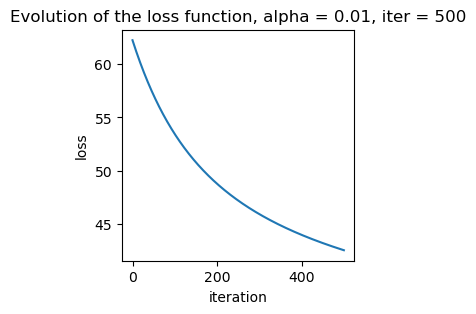

In [494]:
plot_loss('Evolution of the loss function, alpha = 0.01, iter = 500', values)

Now, we estimate labels for the training and the testing dataset. Then we will assess the performance using the [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [495]:
y_train_pred = logistic.predict(X_tr)
y_test_pred = logistic.predict(X_te)

print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')

Performance in the training set:0.8222222222222223

Performance in the test set:0.8



How does your model perform? Are you satisfied? Comment

Your answer here: As the F1-Score is 1, Initially we concluded that there is presence of overfitting but since the dataset is quite small we can ignore this and conclude that model is performing very well for the given data. To further understand the issue with overfitting we observed that F1-Score were similar sometimes when we re-ran the code, this suggests there is neither overfitting nor underfitting and the model is performing quite well. The performance metrics showed high variability. Hence it is different from the output and the written answer to the question.

### Task 2.2: Varying the learning rate and the number of iterations
Run multiple times the fit function, using different values of the learning rate (0.001 and 0.1) and the iterations (500 and 1000). Comment on your results.

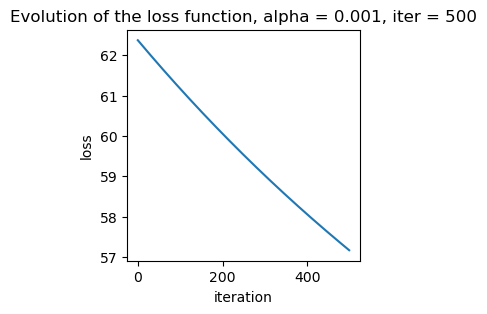

Performance in the training set:0.7956989247311828

Performance in the test set:0.8



In [496]:
fit_new = logistic.fit(X_tr, y_tr, 0.001, 500)
plot_loss('Evolution of the loss function, alpha = 0.001, iter = 500',fit_new)

y_train_pred = logistic.predict(X_tr)
y_test_pred = logistic.predict(X_te)

print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')

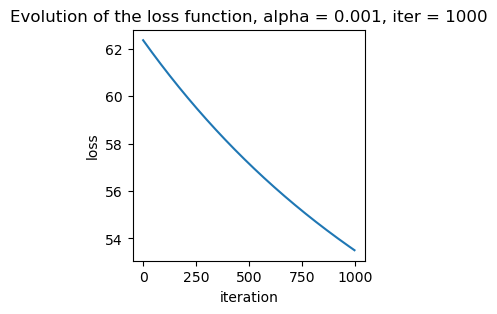

Performance in the training set:0.7956989247311828

Performance in the test set:0.8



In [497]:
fit_new = logistic.fit(X_tr, y_tr, 0.001, 1000)
plot_loss('Evolution of the loss function, alpha = 0.001, iter = 1000',fit_new)

y_train_pred = logistic.predict(X_tr)
y_test_pred = logistic.predict(X_te)

print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')

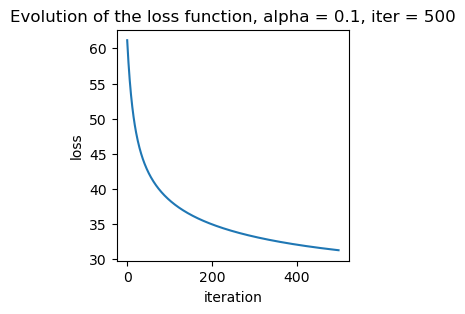

Performance in the training set:0.891566265060241

Performance in the test set:0.9090909090909091



In [498]:
fit_new = logistic.fit(X_tr, y_tr, 0.1, 500)
plot_loss('Evolution of the loss function, alpha = 0.1, iter = 500',fit_new)

y_train_pred = logistic.predict(X_tr)
y_test_pred = logistic.predict(X_te)

print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')

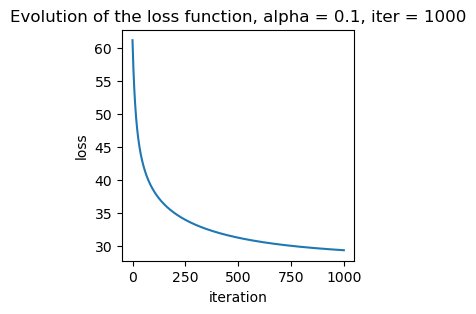

Performance in the training set:0.891566265060241

Performance in the test set:0.9090909090909091



In [499]:
fit_new = logistic.fit(X_tr, y_tr, 0.1, 1000)
plot_loss('Evolution of the loss function, alpha = 0.1, iter = 1000',fit_new)

y_train_pred = logistic.predict(X_tr)
y_test_pred = logistic.predict(X_te)

print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')

Comment on the obtained curves. How does the behavior of the loss changes?

Your answer here: From the plots it is quite clear that different number of iterations have not much affect on the results. Alpha=0.1 is much better than alpha=0.0001 which is a very bad parameter value for the learning rate.
Alpha=0.1 is much better at reducing the loss as it goes from 60 to 20 unlike with the case of Alpha=0.0001 where loss is only reduced to 40. 

## Optional Exercise: Changing the Properties of the Data (Bonus point)
Play around with the make_classification function by varying the number of redundant, repeated and informative features. For each new dataset you generate, train the logistic regression classifier. Comment on the results you obtained. What happens when there are too many redundant and/or repeated features? Too many random ones? How does the number of informative features affect the quality of the classifier?

In [500]:
# Defining a function to plot new curves of loss evolution and get F1-Scores
# after the changes in the parameters of make_classification function.

def play(X,y,title):
    #First we split the data into two sets: training and testing (no validation set in this lab)
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1)

    # Next we standardize the training set
    X_tr, mean, std = standardize(X_tr)

    # The test input features are standardized using the mean and std computed on the training set 
    X_te, _, _ = standardize(X_te, mean, std)

    #We initialize the logistic regression class
    logistic = LogisticRegression() 

    y_tr = y_tr.reshape((len(X_tr),1))
    y_te = y_te.reshape((len(X_te),1))
    #We fit the model using a learning rate of 0.02 and 600 iterations
    values = logistic.fit(X_tr,y_tr, 0.02, 600) 
    y_train_pred = logistic.predict(X_tr)
    y_test_pred = logistic.predict(X_te)
    
    plot_loss(title, values)
    
    print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
    print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')
    
    
    
    


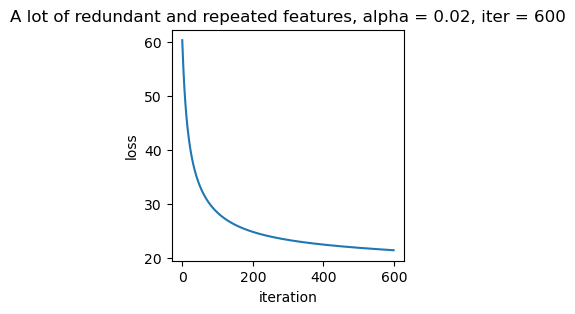

Performance in the training set:0.9230769230769231

Performance in the test set:0.7142857142857143



In [501]:
X, y = make_classification(n_features=100, n_redundant=40, n_repeated=35, n_informative=6, n_classes=2, n_clusters_per_class=1)

play(X, y, 'A lot of redundant and repeated features, alpha = 0.02, iter = 600')

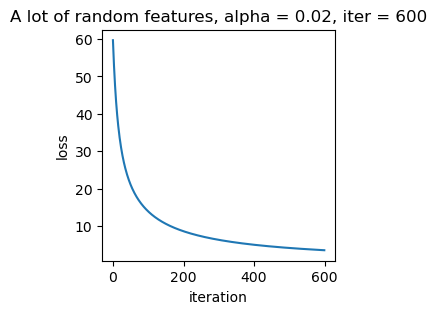

Performance in the training set:1.0

Performance in the test set:0.8750000000000001



In [502]:
X, y = make_classification(n_features=100, n_redundant=0, n_informative=10, n_classes=2, n_clusters_per_class=1)

play(X, y, 'A lot of random features, alpha = 0.02, iter = 600')

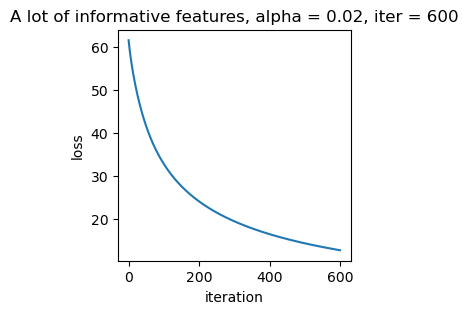

Performance in the training set:1.0

Performance in the test set:0.8571428571428571



In [503]:
X, y = make_classification(n_features=100, n_redundant=2, n_repeated=2, n_informative=80, n_classes=2, n_clusters_per_class=1)

play(X, y,'A lot of informative features, alpha = 0.02, iter = 600')

For the Bonus question we took alpha as 0.02 and number of iterations as 600.

In the case where there are a lot of redundant and repeated features i.e.; 40 and 35 each, the result on test and train set was quite good with F1 Score of 0.85 and 0.91 respectively. The obtained F1 score might suggest overfitting but since it is known that dataset is quite small it is concluded that model is performing well. 

In the case of a lot of random features we only selected 10 informative features out of 100 random features implying the presence of 90 random features. Here it is observed in the plot is almost similar to one where there were a lot of redundant and random features

In case of a lot of informative features that is 80 in this case, It looks like that it is required to increase the number of iterations for the model to be good since the evolution of loss curve is not ideal like it was observed in the case where there were a lot of random and repeated features. It is also known that presence of a lot of informative features lead to overfitting hence it should be avoided.